In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
X_train = torch.tensor([[[[4, 5, 6, 7], [5, 6, 7, 8], [8, 9, 10, 11], [4, 6, 7, 8]]], [[[-4, 5, 6, -7], [5, -6, 7, 8], [-8, -9, -10, 11], [-4, -6, -7, -8]]]]).float().to(device)
X_train.div(8)
y_train = torch.tensor([0, 1]).float().to(device)

In [3]:
X_train.shape

torch.Size([2, 1, 4, 4])

In [4]:
y_train.shape

torch.Size([2])

In [5]:
import torch.nn as nn
from torch.optim import Adam

In [6]:
def get_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(1,1),
        nn.Sigmoid()
    ).to(device)
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.01)

    return model, loss_fn, optimizer

In [7]:
model, loss_fn, optimizer = get_model()

In [8]:
model

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [9]:
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x)
    batch_loss = loss_fn(y_pred.squeeze(), y.squeeze())
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [10]:
from torch.utils.data import TensorDataset, Dataset, DataLoader
train_dl = DataLoader(TensorDataset(X_train, y_train))

In [11]:
losses = []
for epoch in range(300):
    avg_loss = 0
    for ix, batch in enumerate(train_dl):
        x, y = batch
        x = x.to(device)
        y = y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        avg_loss = (avg_loss + batch_loss) / 2
    losses.append(batch_loss)

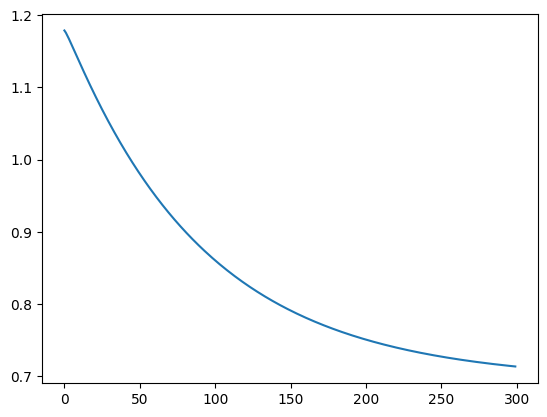

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)